In [15]:
import pandas as pd

data = []

for Line in open("iris.data", "r"):
  raw = Line.split(",")
  x = [float(r) for r in raw[:4]]
  y = raw[4].strip()
  data.append((x, y))

data

[([5.1, 3.5, 1.4, 0.2], 'Iris-setosa'),
 ([4.9, 3.0, 1.4, 0.2], 'Iris-setosa'),
 ([4.7, 3.2, 1.3, 0.2], 'Iris-setosa'),
 ([4.6, 3.1, 1.5, 0.2], 'Iris-setosa'),
 ([5.0, 3.6, 1.4, 0.2], 'Iris-setosa'),
 ([5.4, 3.9, 1.7, 0.4], 'Iris-setosa'),
 ([4.6, 3.4, 1.4, 0.3], 'Iris-setosa'),
 ([5.0, 3.4, 1.5, 0.2], 'Iris-setosa'),
 ([4.4, 2.9, 1.4, 0.2], 'Iris-setosa'),
 ([4.9, 3.1, 1.5, 0.1], 'Iris-setosa'),
 ([5.4, 3.7, 1.5, 0.2], 'Iris-setosa'),
 ([4.8, 3.4, 1.6, 0.2], 'Iris-setosa'),
 ([4.8, 3.0, 1.4, 0.1], 'Iris-setosa'),
 ([4.3, 3.0, 1.1, 0.1], 'Iris-setosa'),
 ([5.8, 4.0, 1.2, 0.2], 'Iris-setosa'),
 ([5.7, 4.4, 1.5, 0.4], 'Iris-setosa'),
 ([5.4, 3.9, 1.3, 0.4], 'Iris-setosa'),
 ([5.1, 3.5, 1.4, 0.3], 'Iris-setosa'),
 ([5.7, 3.8, 1.7, 0.3], 'Iris-setosa'),
 ([5.1, 3.8, 1.5, 0.3], 'Iris-setosa'),
 ([5.4, 3.4, 1.7, 0.2], 'Iris-setosa'),
 ([5.1, 3.7, 1.5, 0.4], 'Iris-setosa'),
 ([4.6, 3.6, 1.0, 0.2], 'Iris-setosa'),
 ([5.1, 3.3, 1.7, 0.5], 'Iris-setosa'),
 ([4.8, 3.4, 1.9, 0.2], 'Iris-setosa'),


In [16]:
def distance(a, b):
  s = 0
  for x, y in zip(a, b):
    s += (x - y) ** 2
  return s ** 0.5

def distance2(a, b):
  return sum((x - y) ** 2 for x, y in zip(a, b)) ** 0.5

In [17]:
a = distance(data[0][0], data[1][0])
b = distance2(data[0][0], data[1][0])

print(a, b)

0.5385164807134502 0.5385164807134502


In [27]:
from collections import Counter

def knn_classify(k, query, train):
  # query = [6.3, 2.7, 4.9, 1.8]
  # train = ([6.5, 3.0, 5.2, 2.0], 'Iris-virginica'),
          # ([6.2, 3.4, 5.4, 2.3], 'Iris-virginica'),
          # ([5.9, 3.0, 5.1, 1.8], 'Iris-virginica')] 

  # ex = [(23.5, 'Iris-virginica'), (51.3, 'Iris-virginica'), ...]
  # ex.sort()

  res = sorted((distance2(query, y), L) for y, L in train)[:k]
  cnts = Counter(r[1] for r in res)
  mc = cnts.most_common(2)

  while len(cnts) >= 2 and mc[0][1] == mc[1][1]:
    res = res[:-1]
    cnts = Counter(r[1] for r in res)
    mc = cnts.most_common(2)

  return cnts.most_common(1)[0][0]

knn_classify(10, [5.5, 3.1, 5.0, 1.7], data)

'Iris-virginica'

In [32]:
k = 5

n_correct = 0
n_incorrect = 0

for i, q in enumerate(data):
  # q = ([6.5, 3.0, 5.2, 2.0], 'Iris-virginica'),
          # ([6.2, 3.4, 5.4, 2.3], 'Iris-virginica'),
          # ([5.9, 3.0, 5.1, 1.8], 'Iris-virginica')] 
  new_data = []
  for j, d in enumerate(data):
    if i == j: continue;
    new_data.append(d)

  ans = knn_classify(k, q[0], new_data)
  true_ans = q[1]

  if ans == true_ans:
    n_correct += 1
  else:
    n_incorrect += 1
    
print("accuracy", n_correct/ (n_correct + n_incorrect))

accuracy 0.9666666666666667


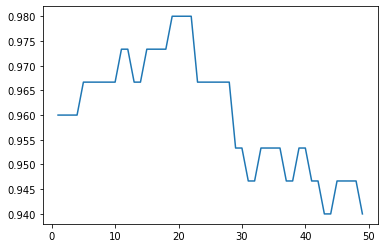

In [34]:
import matplotlib.pyplot as plt

X = []
Y = []

for k in range(1, 50):
  n_correct = 0
  n_incorrect = 0

  for i, q in enumerate(data):
    # q = ([6.5, 3.0, 5.2, 2.0], 'Iris-virginica'),
            # ([6.2, 3.4, 5.4, 2.3], 'Iris-virginica'),
            # ([5.9, 3.0, 5.1, 1.8], 'Iris-virginica')] 
    new_data = []
    for j, d in enumerate(data):
      if i == j: continue;
      new_data.append(d)

    ans = knn_classify(k, q[0], new_data)
    true_ans = q[1]

    if ans == true_ans:
      n_correct += 1
    else:
      n_incorrect += 1
    
  X.append(k)
  Y.append(n_correct/ (n_correct + n_incorrect))

plt.plot(X, Y)
plt.show()